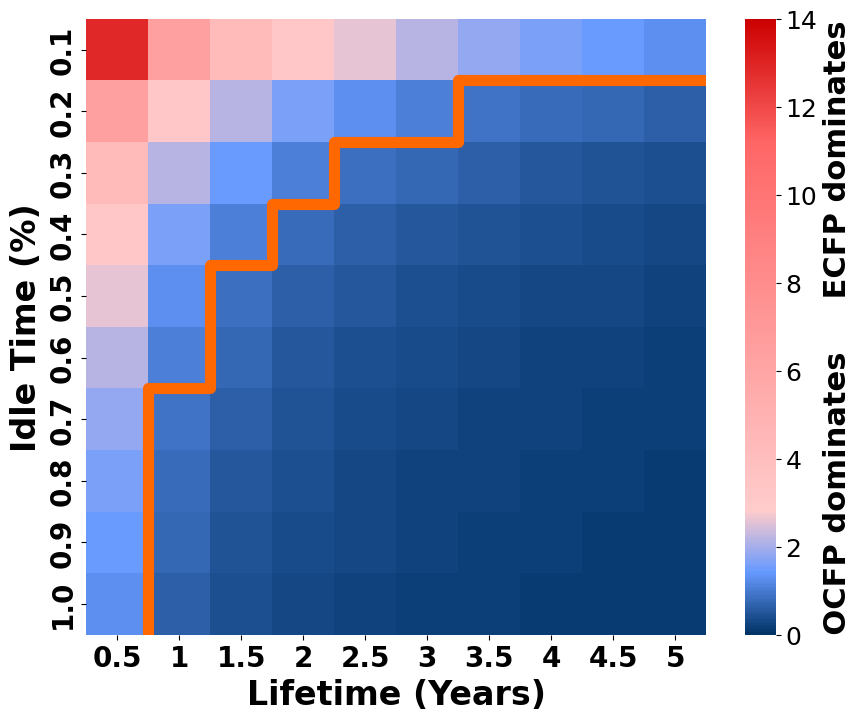

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV file
file_path = 'A100-SXM_data.csv'
data = pd.read_csv(file_path)

# Extract data for the heatmap
idle_time = data['Idle Time']
time_periods = data.columns[1:]  # Exclude 'Idle Time' column
heatmap_data = data.iloc[:, 1:].values  # Only the numerical data for the heatmap

# Define a custom colormap for values with a focus on values >1
nodes = [0, 0.1, 0.2, 0.8, 1]  # Allocate more space for values >1
colors = ["#003366", "#6699FF", "#FFCCCC", "#FF6666", "#CC0000"]
custom_cmap = LinearSegmentedColormap.from_list("blue_red_scale", list(zip(nodes, colors)))

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heatmap_data, 
    cmap=custom_cmap, 
    xticklabels=time_periods, 
    yticklabels=idle_time, 
    vmin=0, 
    vmax=14
)

# ax.tick_params(axis='both', which='major', labelsize=12)  # Major ticks
# ax.tick_params(axis='both', which='minor', labelsize=12)  


x_points = [1,  1,  1, 2, 2, 3, 3, 4, 4, 6, 6, 10] 
y_points = [10, 10, 6, 6, 4, 4, 3, 3, 2, 2, 1, 1]  
ax.plot(
    x_points, 
    y_points, 
    color="#FF6700", linewidth=8
)

# Ensure the line stays within the grid bounds
ax.set_xlim(0, len(time_periods))
ax.set_ylim(len(idle_time), 0)  # Inverted y-axis for heatmap

# Set labels and title
plt.xlabel('Lifetime (Years)', fontsize=24, fontweight='bold')
plt.ylabel('Idle Time (%)', fontsize=24, fontweight='bold')

plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

colorbar = ax.collections[0].colorbar  # Access the color bar of the heatmap
colorbar.ax.set_ylabel('                       OCFP dominates     ECFP dominates                       ', rotation=90, labelpad=4, fontsize=22, fontweight='bold')# Set the main label for the color bar

colorbar.ax.tick_params(labelsize=18)

# Save the plot to a PDF file
output_pdf = 'A100-SXM_heatmap.pdf'
plt.savefig(output_pdf, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()
